In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FOLDER = "./vehicle-exports/"
MEASUREMENTS=["delay", "latitude", "longitude", "bearing"]
TARGET="delay"
WEATHER=["temp_c", "humidity", "precip_mm", "wind_kph"] 
RIDS=["66", "111", "23", "57", "1"]

In [2]:
def merge_data(vehicle):
    vehicle['time'] = pd.to_datetime(vehicle['time'])
    vehicle = vehicle.sort_values('time')

    weather = pd.read_csv(f"./weather-exports/weather.csv")
    weather['time'] = pd.to_datetime(weather['time'])
    weather = weather.sort_values('time')

    vehicle = pd.merge_asof(
        vehicle.sort_values('time'),
        weather.sort_values('time'),
        on='time',
        direction='backward'
    )

    vehicle['time'] = pd.to_datetime(vehicle['time'])
    return vehicle

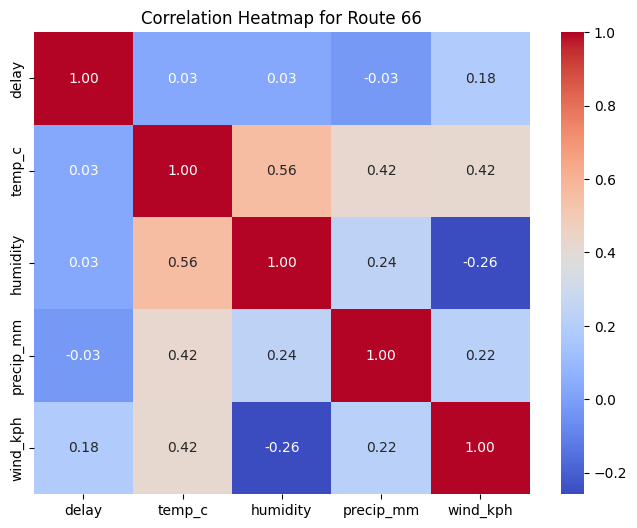

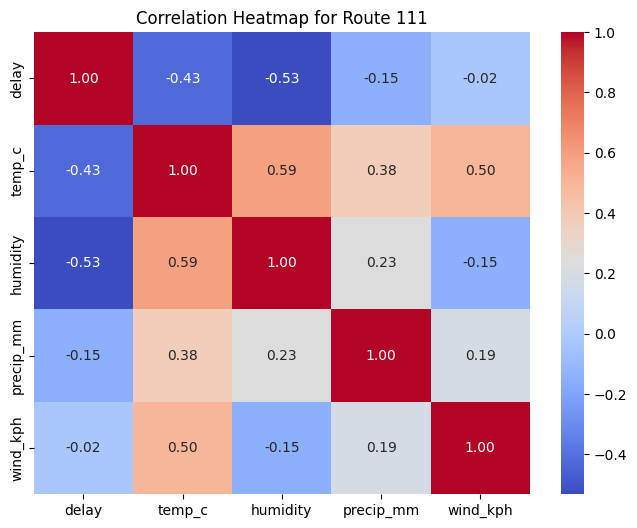

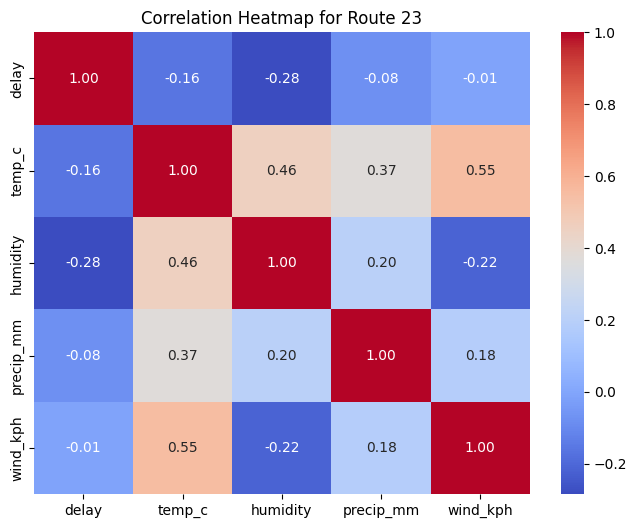

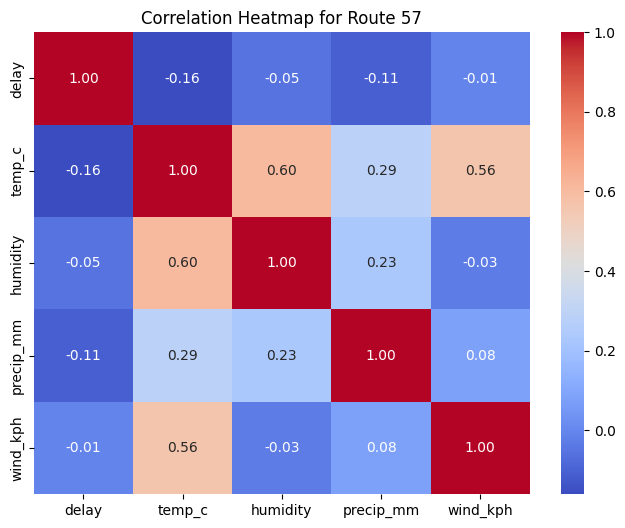

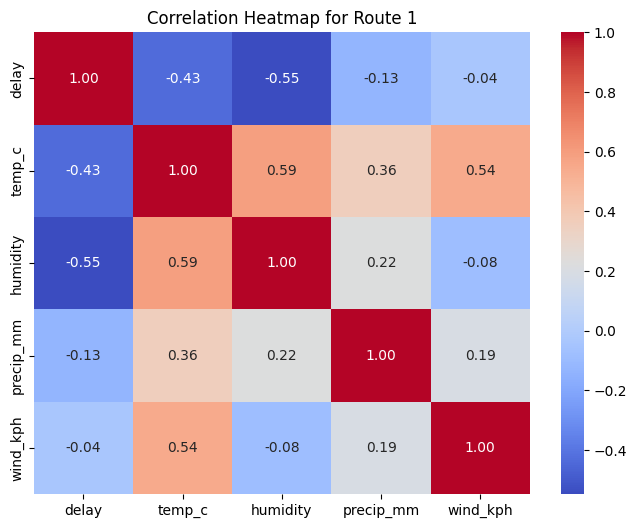

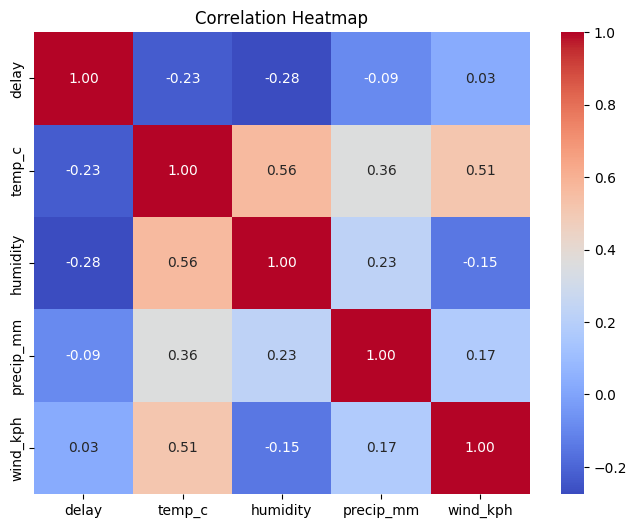

In [3]:
dfs = [] 
for rid in RIDS:
    df = merge_data(pd.read_csv(f"{FOLDER}route_{rid}.csv"))
    dfs.append(df)
    corr = df[[TARGET] + WEATHER].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for Route {rid}")
    plt.savefig(f"img/corr_map_r{rid}")
    plt.show()

df = pd.concat(dfs, axis=0)
df = df.sort_values('time')
corr = df[[TARGET] + WEATHER].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Heatmap")
plt.savefig(f"img/corr_map")
plt.show()

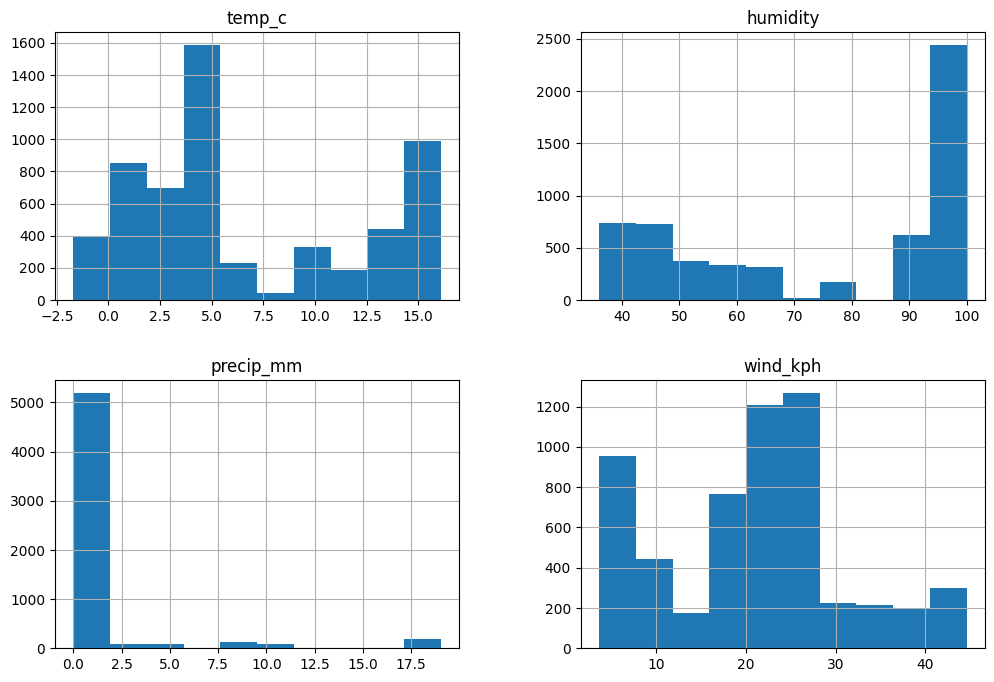

In [4]:
df[WEATHER].hist(figsize=(12, 8))
plt.savefig(f"img/hist")
plt.show()

In [5]:
vehicle = merge_data(pd.read_csv(f"{FOLDER}route_66.csv"))
vehicle = vehicle.sort_values(by=['time', 'trip', 'current_stop_sequence'])
vehicle['delay'] = vehicle.groupby('trip')['delay'].diff().fillna(0)
vehicle['delay'] = vehicle['delay'].apply(lambda x: max(x, 0))
vehicle['time'] = pd.to_datetime(vehicle['time'])
vehicle['hour'] = vehicle['time'].dt.hour
delays_per_hour = vehicle.groupby('hour')['delay'].agg(['mean', 'median', 'sum', 'count'])
print(delays_per_hour)

            mean  median     sum  count
hour                                   
0      11.258065     0.0  1047.0     93
1      83.197917    69.5  7987.0     96
2     122.850000     0.0  2457.0     20
4       0.000000     0.0     0.0     23
5       6.700000     0.0   335.0     50
6      25.318182     4.5  1114.0     44
7       9.061224     0.0   444.0     49
8      32.333333     0.0  1455.0     45
9      34.139535    15.0  1468.0     43
10     19.625000     0.0   942.0     48
11     21.705882     0.0  1107.0     51
12     27.813953     4.0  1196.0     43
13     21.291667     0.0  1022.0     48
14     23.660000     0.0  1183.0     50
15     15.136364     0.0   333.0     22
17     25.266667     0.0   379.0     15
18     24.574468     0.0  1155.0     47
19     21.161765     0.0  1439.0     68
20     22.701299     0.0  1748.0     77
21     34.764045     0.0  3094.0     89
22      8.298969     0.0   805.0     97
23     26.494253     0.0  2305.0     87
